 <div class="alert alert-block alert-info"><font size="5"><center><b><u>Projecte Data Science </u></b></center></font>   
 <div class="alert alert-block alert-info"><font size="5"><center><b><u>CryptoPunks</u></b></center></font>   



\begin{align*}Anton\:Sobrino\end{align*}

\begin{align*}Juliol\hspace{2mm}\hspace{2mm}2021\end{align*}</div>

In [1]:
#Importació llibreries bàsiques 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import random
import re

#Importació Llibrereis per webscrapping
from selenium import webdriver

#Importacion 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time

#reporting
#from pandas_profiling import ProfileReport

#warnings
import warnings
warnings.filterwarnings('ignore')
#Options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)


driver = webdriver.Chrome(executable_path=r'C:\Users\Anton SL\bin_chrome\Chromedriver.exe')
#engine = create_engine('mysql+mysqlconnector://root:Zxcvbn123+-@' + 127001 +'/cryptopunks', echo=False)
time.sleep(random.uniform(2.0,2.0))

# profile report


K = 1000
M = 1000000

### <span style=color:darkred> CriptoPunks Transacciones</span>

##### Aquesta tbl per obtenir les transacion esta sense us. vna obtindre les dades dels companys. funcionava pero calia millorar els temps de espera.

# <span style=color:darkblue>A. Obtencio dades des de la web de Crypto Punks</span>

### <span style=color:darkred>1. tbl Master</span>

##### Aquesta tbl serveix per ordenar tota la base de dades 

In [2]:
master_df = pd.DataFrame(range(0,10000), columns=['NumCriptoPunk'])
master_df.to_csv('master.csv')
master_df

,NumCriptoPunk
0,0
1,1
2,2
3,3
4,4
...,...
9995,9995
9996,9996
9997,9997
9998,9998


In [3]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   NumCriptoPunk  10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


### <span style=color:darkred>2. tbl Top Sales</span>

##### Aquesta tbl obtinguda www.larvalabs.com ens infrorma del ranking de mes venuts i podem ferla servir per fer comapracions. Es pot actualitzar diariament.

In [4]:
url1 = 'https://www.larvalabs.com/cryptopunks/topsales?sortByUSD=false'
driver.get(url1)

In [5]:
MyListaAnidada=[]

for n in range(1, 100):
    try:
        CPunks = driver.find_element_by_xpath('/html/body/div[2]/div/div[2]/div['+ str(n)+ ']').text
        mylista = CPunks.split()
        MyListaAnidada.append(mylista[0:3])
    except:
        pass

df_topsales= pd.DataFrame(MyListaAnidada,columns =['Ranking','Num_CriptoPunk','Valor_ETH'])
df_topsales['Num_CriptoPunk'] = df_topsales['Num_CriptoPunk'].str.lstrip('#').astype('int64')
df_topsales['Valor_ETH']=df_topsales['Valor_ETH'].str.rstrip('Ξ') 
df_topsales['Valor_ETH']=df_topsales['Valor_ETH'].str.rstrip('K') 
df_topsales['Valor_ETH']=pd.to_numeric(df_topsales['Valor_ETH'])
df_topsales['Ranking']=pd.to_numeric(df_topsales['Ranking'])
df_topsales.to_csv('topsales.csv')
df_topsales.head(5)

,Ranking,Num_CriptoPunk,Valor_ETH
0,1,3100,4.2
1,2,7804,4.2
2,3,6965,800.0
3,4,2140,750.0
4,5,3011,667.0


In [6]:
df_topsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ranking         60 non-null     int64  
 1   Num_CriptoPunk  60 non-null     int64  
 2   Valor_ETH       60 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.5 KB


### <span style=color:darkred>3.tbl types of Crypto Punks</span>

##### tbl obtinguda de www.larvalabs.com amb la informació deks diferents types

In [7]:
url1 = 'https://www.larvalabs.com/cryptopunks/attributes'
driver.get(url1)


In [8]:
rows = len(driver.find_elements_by_xpath('/html/body/div[2]/div/div[3]/div/div[1]/table/tbody/tr'))
col = len(driver.find_elements_by_xpath('/html/body/div[2]/div/div[3]/div/div[1]/table/thead/tr[2]/th'))


print('col:', str(col), 'i rows:', str(rows) )

col: 6 i rows: 5


In [9]:
col_nom = []
for n in range(1,rows + 1):
    if n -1  < col :
        n == n-1
        col_nom.append(driver.find_element_by_xpath('/html/body/div[2]/div/div[3]/div/div[1]/table/thead/tr[2]/th[' + str(n) + ']').text)

col_nom

['Attribute', '#', 'Avail', 'Avg Sale', 'Cheapest']

In [10]:
MyListaAnidada = []
for n in range (1,rows + 1 ):
    mylista=[]
    for b in range (1, col):
        dato= driver.find_element_by_xpath('/html/body/div[2]/div/div[3]/div/div[1]/table/tbody/tr[' + str(n) + ']/td[' +str(b) +']').text
        mylista.append(dato)
        if len(mylista)== len(col_nom):
            MyListaAnidada.append(mylista)

df_types = pd.DataFrame(MyListaAnidada, columns = col_nom)
df_types.columns = ['Attribute', 'NumPunks', 'Avail', 'Avg_Sale_ETH', 'Cheapest_ETH']
#df_types['Avg_Sale_ETH'] = df_types['Avg_Sale_ETH'].str.extract(r'(0-9.\-)')
df_types['Avg_Sale_ETH']=df_types['Avg_Sale_ETH'].str.rstrip('Ξ') 
df_types['Avg_Sale_ETH']=df_types['Avg_Sale_ETH'].str.rstrip('K')
df_types['Cheapest_ETH']=df_types['Cheapest_ETH'].str.rstrip('Ξ') 
df_types['Cheapest_ETH']=df_types['Cheapest_ETH'].str.rstrip('K')
df_types['NumPunks']=pd.to_numeric(df_types['NumPunks'])
df_types['Avail']=pd.to_numeric(df_types['Avail'])
df_types['Avg_Sale_ETH']=pd.to_numeric(df_types['Avg_Sale_ETH']) 
df_types['Cheapest_ETH']=pd.to_numeric(df_types['Cheapest_ETH'])
df_types = df_types.fillna(0)
df_types.to_csv('types.csv')
df_types

,Attribute,NumPunks,Avail,Avg_Sale_ETH,Cheapest_ETH
0,Alien,9,0,0.00,0.00
1,Ape,24,4,0.00,1.60
2,Zombie,88,9,424.50,444.00
3,Female,3840,668,30.00,18.50
4,Male,6039,982,27.18,17.85


In [11]:
df_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Attribute     5 non-null      object 
 1   NumPunks      5 non-null      int64  
 2   Avail         5 non-null      int64  
 3   Avg_Sale_ETH  5 non-null      float64
 4   Cheapest_ETH  5 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 328.0+ bytes


### <span style=color:darkred>4. tbl Skin</span>

##### tbl obtinguda de https://defypunk.com/punks/ amb la informació deks diferents types

In [12]:
url1 = 'https://defypunk.com/punks/'
driver.get(url1)

In [13]:
skin=(driver.find_element_by_xpath('//*[@id="root"]/div/main/div/div/div[2]/div[2]/button')).text

In [14]:
mylista = []
MyListaAnidada=[]
df_skin = pd.DataFrame(columns=['skin','NumP', 'Punks'])

for i in range(1,10):
    try:
        skin=(driver.find_element_by_xpath('//*[@id="root"]/div/main/div/div/div[2]/div['+ str(i) +']/button')).text
        mylista.append(skin.split())
    except:
        pass
                       
df_skin = pd.DataFrame(mylista,columns=['skin','NumP', 'Punks'])
df_skin = df_skin.drop(['Punks'],axis=1)
df_skin['NumP']=df_skin['NumP'].str.replace('(','')
df_skin['NumP']=df_skin['NumP'].str.replace(',','')
df_skin['NumP']=pd.to_numeric(df_skin['NumP'])
df_skin.to_csv('skin.csv')
df_skin

,skin,NumP
0,Alien,9
1,Ape,24
2,Zombie,88
3,Albino,1018
4,Dark,2824
5,Light,3006
6,Mid,3031


In [15]:
df_skin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   skin    7 non-null      object
 1   NumP    7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


### <span style=color:darkred>5. tbl Attibutes</span>

##### tbl obtinguda de https://www.larvalabs.com/cryptopunks/attributes' amb la informació deks diferents types

In [16]:
url1 = 'https://www.larvalabs.com/cryptopunks/attributes'
driver.get(url1)

In [17]:
rows = len(driver.find_elements_by_xpath('/html/body/div[2]/div/div[3]/div/div[2]/table/tbody/tr'))
col = len(driver.find_elements_by_xpath('/html/body/div[2]/div/div[3]/div/div[2]/table/thead/tr[2]/th'))


print('col:', str(col), 'i rows:', str(rows) )

col: 6 i rows: 87


In [18]:
col_nom = []
for n in range(1,col + 1):
    if n   < col :
        n == n -1
        col_nom.append(driver.find_element_by_xpath('/html/body/div[2]/div/div[3]/div/div[2]/table/thead/tr[2]/th[' + str(n) + ']').text)

col_nom

['Attribute', '#', 'Avail', 'Avg Sale', 'Cheapest']

In [19]:
MyListaAnidada = []
for n in range (1,rows + 1 ):
    mylista=[]
    for b in range (1, col):
        dato= driver.find_element_by_xpath('/html/body/div[2]/div/div[3]/div/div[2]/table/tbody/tr[' + str(n) + ']/td[' +str(b) +']').text
        mylista.append(dato)
        if len(mylista)== len(col_nom):
            MyListaAnidada.append(mylista)
            
df_Attibutes = pd.DataFrame(MyListaAnidada, columns = col_nom)
df_Attibutes.columns = ['Attribute', 'NumPunks', 'Avail', 'Avg_Sale_ETH', 'Cheapest_ETH']
df_Attibutes['Avg_Sale_ETH']=df_Attibutes['Avg_Sale_ETH'].str.rstrip('Ξ') 
df_Attibutes['Avg_Sale_ETH']=df_Attibutes['Avg_Sale_ETH'].str.rstrip('K')
df_Attibutes['Cheapest_ETH']=df_Attibutes['Cheapest_ETH'].str.rstrip('Ξ') 
df_Attibutes['Cheapest_ETH']=df_Attibutes['Cheapest_ETH'].str.rstrip('K')
df_Attibutes['Avg_Sale_ETH']=pd.to_numeric(df_Attibutes['Avg_Sale_ETH'])
df_Attibutes['Cheapest_ETH']=pd.to_numeric(df_Attibutes['Cheapest_ETH'])
df_Attibutes['NumPunks']=pd.to_numeric(df_Attibutes['NumPunks'])
df_Attibutes['Avail']=pd.to_numeric(df_Attibutes['Avail'])
df_Attibutes = df_Attibutes.fillna(0)
df_Attibutes

,Attribute,NumPunks,Avail,Avg_Sale_ETH,Cheapest_ETH
0,Beanie,44,11,156.00,220.00
1,Choker,48,7,67.33,75.00
2,Pilot Helmet,54,12,121.20,130.00
3,Tiara,55,14,67.00,67.99
4,Orange Side,68,15,96.03,65.56
5,Buck Teeth,78,16,47.96,49.98
6,Welding Goggles,86,17,57.40,48.00
7,Pigtails,94,9,49.83,39.25
8,Pink With Hat,95,16,45.51,38.00
9,Top Hat,115,37,57.86,43.00


In [20]:
df_Attibutes = df_Attibutes.append({'Attribute': 'no accesories', 'NumPunks' : 0, 'Avail' : 0 , 'Avg_Sale_ETH': 0 , 'Cheapest_ETH' : 0 }, ignore_index=True)

In [21]:
df_Attibutes

,Attribute,NumPunks,Avail,Avg_Sale_ETH,Cheapest_ETH
0,Beanie,44,11,156.00,220.00
1,Choker,48,7,67.33,75.00
2,Pilot Helmet,54,12,121.20,130.00
3,Tiara,55,14,67.00,67.99
4,Orange Side,68,15,96.03,65.56
5,Buck Teeth,78,16,47.96,49.98
6,Welding Goggles,86,17,57.40,48.00
7,Pigtails,94,9,49.83,39.25
8,Pink With Hat,95,16,45.51,38.00
9,Top Hat,115,37,57.86,43.00


In [22]:
df_Attibutes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Attribute     88 non-null     object 
 1   NumPunks      88 non-null     int64  
 2   Avail         88 non-null     int64  
 3   Avg_Sale_ETH  88 non-null     float64
 4   Cheapest_ETH  88 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 3.6+ KB


In [23]:
df_Attibutes.to_csv('Attibutes.csv')

### <span style=color:darkred>6. tbl Rarity</span>

##### Tbl Aram

In [61]:
df_rar = pd.read_csv('rarity_score.csv')

In [62]:
df_rar

,id,total_score
0,8348,0.000200
1,3443,0.000441
2,7523,0.000525
3,2890,0.000677
4,7804,0.000708
...,...,...
9995,4422,0.681446
9996,2578,0.681446
9997,2414,0.681778
9998,5171,0.681778


### <span style=color:darkred>7. tbl Attrubutes</span>

##### Tbl Aram

In [24]:
punks_df= pd.read_csv('Punks.csv')

In [25]:
punks_df.head(5)

,Unnamed: 0,id,type,count,accesories
0,0,0,Female,3,Green Eye Shadow / Earring / Blonde Bob
1,1,1,Male,2,Smile / Mohawk
2,2,2,Female,1,Wild Hair
3,3,3,Male,3,Wild Hair / Nerd Glasses / Pipe
4,4,4,Male,4,Big Shades / Wild Hair / Earring / Goat


In [26]:
punks_df= punks_df.drop(['Unnamed: 0'], axis=1)

In [27]:
punks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          10000 non-null  int64 
 1   type        10000 non-null  object
 2   count       10000 non-null  int64 
 3   accesories  10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


In [28]:
df = pd.DataFrame(punks_df.accesories)

In [29]:
df1 = df['accesories'].str.split('/', expand=True).stack()

In [30]:
df1

0     0     Green Eye Shadow 
      1              Earring 
      2            Blonde Bob
1     0                Smile 
      1                Mohawk
                  ...        
9998  0      Wild White Hair 
      1       Black Lipstick 
      2      Clown Eyes Green
9999  0               Mohawk 
      1          Nerd Glasses
Length: 27547, dtype: object

In [31]:
df1 = df1.reset_index(level=1,drop=True).rename('accesories1')

In [32]:
df1

0        Green Eye Shadow 
0                 Earring 
0               Blonde Bob
1                   Smile 
1                   Mohawk
               ...        
9998      Wild White Hair 
9998       Black Lipstick 
9998      Clown Eyes Green
9999               Mohawk 
9999          Nerd Glasses
Name: accesories1, Length: 27547, dtype: object

In [33]:
punks_df=punks_df.drop('accesories', axis=1)


In [34]:
punks_df = punks_df.join(df1)

In [35]:
punks_df['count'] = 1

In [36]:
punks_df

,id,type,count,accesories1
0,0,Female,1,Green Eye Shadow
0,0,Female,1,Earring
0,0,Female,1,Blonde Bob
1,1,Male,1,Smile
1,1,Male,1,Mohawk
...,...,...,...,...
9998,9998,Female,1,Wild White Hair
9998,9998,Female,1,Black Lipstick
9998,9998,Female,1,Clown Eyes Green
9999,9999,Female,1,Mohawk


In [37]:
punks_df = punks_df.reset_index(drop=True)

In [38]:
punks_df["type"] = punks_df["type"].str.extract(r'(\w+)')
punks_df["accesories1"] = punks_df["accesories1"].str.extract(r'(\w+\D+)')
punks_df["accesories2"] = punks_df["accesories1"].str.rstrip()

punks_df
#df_Attibutes['Attribute'] = df_Attibutes['Attribute'].str.lower() 

,id,type,count,accesories1,accesories2
0,0,Female,1,Green Eye Shadow,Green Eye Shadow
1,0,Female,1,Earring,Earring
2,0,Female,1,Blonde Bob,Blonde Bob
3,1,Male,1,Smile,Smile
4,1,Male,1,Mohawk,Mohawk
...,...,...,...,...,...
27542,9998,Female,1,Wild White Hair,Wild White Hair
27543,9998,Female,1,Black Lipstick,Black Lipstick
27544,9998,Female,1,Clown Eyes Green,Clown Eyes Green
27545,9999,Female,1,Mohawk,Mohawk


In [39]:
punks_df['idaccesories']=''

In [40]:
for i in range(len(punks_df)):
    myacc =punks_df['accesories2'].iloc[i]
    for n in range(len(df_Attibutes)):
        if myacc == df_Attibutes.Attribute[n]:
            punks_df['idaccesories'][i] = n


In [41]:
punks_df

,id,type,count,accesories1,accesories2,idaccesories
0,0,Female,1,Green Eye Shadow,Green Eye Shadow,42
1,0,Female,1,Earring,Earring,86
2,0,Female,1,Blonde Bob,Blonde Bob,20
3,1,Male,1,Smile,Smile,34
4,1,Male,1,Mohawk,Mohawk,67
...,...,...,...,...,...,...
27542,9998,Female,1,Wild White Hair,Wild White Hair,13
27543,9998,Female,1,Black Lipstick,Black Lipstick,81
27544,9998,Female,1,Clown Eyes Green,Clown Eyes Green,61
27545,9999,Female,1,Mohawk,Mohawk,67


In [42]:
punks_df.isnull().sum()

id              0
type            0
count           0
accesories1     8
accesories2     8
idaccesories    0
dtype: int64

In [43]:
punks_df['idaccesories'] = punks_df['idaccesories'].apply(lambda x : 87 if x == '' else x)

In [44]:
#no tenen atribust
punks_df = punks_df.drop('accesories1', axis=1)

In [45]:

punks_df.isnull().sum()

id              0
type            0
count           0
accesories2     8
idaccesories    0
dtype: int64

In [46]:
punks_df.to_csv('punks_accesories.csv')

### <span style=color:darkred>8. tbl historico</span>

##### Tbl Aram

In [47]:
hist_df = pd.read_csv('transaccions_hist_df.csv')
hist_df

,Date,Number,Type,From,To,Amount_dolars,Amount_eth,user_transaction,Adj Close
0,2021-05-10,0,Bid withdrawn,0x983ace,NaN,988073.49,250.000,0x0987ef,3952.293945
1,2021-04-11,0,Bid,0x983ace,NaN,539414.25,250.000,0xdbf1a0,2157.656982
2,2021-03-03,0,Bid withdrawn,0xd7510a,NaN,157585.31,100.000,0x580c05,1575.853149
3,2021-02-21,0,Bid,0xd7510a,NaN,193560.11,100.000,0x5377c3,1935.601074
4,2020-09-16,0,Bid withdrawn,0x63a9db,NaN,25241.05,69.000,0xbce1fe,365.812286
...,...,...,...,...,...,...,...,...,...
133786,2017-07-03,9999,Bid,0xa0a59c,NaN,70.72,0.250,0xee9da1,282.898010
133787,2017-06-27,9999,Bid,0x717403,NaN,58.62,0.200,0x12f9f7,293.088013
133788,2017-06-24,9999,Bid,0x6301Ad,NaN,64.74,0.200,0x205b42,323.696014
133789,2017-06-24,9999,Bid,0x5b098b,NaN,49.85,0.154,0xfa448c,323.696014


In [48]:
hist_df.describe()

,Number,Amount_dolars,Amount_eth,Adj Close
count,133791.000000,8.917800e+04,8.964300e+04,132915.000000
mean,5294.320253,8.660394e+58,3.096686e+55,1254.027718
std,2767.763905,5.356193e+60,1.892318e+57,1026.605935
min,0.000000,0.000000e+00,0.000000e+00,84.308296
25%,2978.000000,2.503775e+02,1.000000e+00,341.739014
50%,5332.000000,1.451436e+04,1.200000e+01,1230.172241
75%,7668.000000,5.569008e+04,2.650000e+01,1924.685425
max,9999.000000,4.511097e+62,1.157903e+59,4168.701172


In [49]:
hist_df.isnull().sum()

Date                    0
Number                  0
Type                    0
From                72081
To                  95213
Amount_dolars       44613
Amount_eth          44148
user_transaction        0
Adj Close             876
dtype: int64

In [50]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133791 entries, 0 to 133790
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              133791 non-null  object 
 1   Number            133791 non-null  int64  
 2   Type              133791 non-null  object 
 3   From              61710 non-null   object 
 4   To                38578 non-null   object 
 5   Amount_dolars     89178 non-null   float64
 6   Amount_eth        89643 non-null   float64
 7   user_transaction  133791 non-null  object 
 8   Adj Close         132915 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 9.2+ MB


In [51]:
hist_df [['Amount_dolars','Amount_eth','Adj Close']] = hist_df[['Amount_dolars','Amount_eth','Adj Close']].fillna(0)

In [52]:
hist_df['To'] = hist_df['To'].fillna('no')
hist_df['From'] = hist_df['From'].fillna('no') 

In [53]:
hist_df.isnull().sum().sum()

0

In [54]:
hist_df = hist_df.round(5)

In [55]:
hist_df= hist_df.rename(columns={'Date':'Transaccion_Date'})
hist_df

,Transaccion_Date,Number,Type,From,To,Amount_dolars,Amount_eth,user_transaction,Adj Close
0,2021-05-10,0,Bid withdrawn,0x983ace,no,988073.49,250.000,0x0987ef,3952.29395
1,2021-04-11,0,Bid,0x983ace,no,539414.25,250.000,0xdbf1a0,2157.65698
2,2021-03-03,0,Bid withdrawn,0xd7510a,no,157585.31,100.000,0x580c05,1575.85315
3,2021-02-21,0,Bid,0xd7510a,no,193560.11,100.000,0x5377c3,1935.60107
4,2020-09-16,0,Bid withdrawn,0x63a9db,no,25241.05,69.000,0xbce1fe,365.81229
...,...,...,...,...,...,...,...,...,...
133786,2017-07-03,9999,Bid,0xa0a59c,no,70.72,0.250,0xee9da1,282.89801
133787,2017-06-27,9999,Bid,0x717403,no,58.62,0.200,0x12f9f7,293.08801
133788,2017-06-24,9999,Bid,0x6301Ad,no,64.74,0.200,0x205b42,323.69601
133789,2017-06-24,9999,Bid,0x5b098b,no,49.85,0.154,0xfa448c,323.69601


In [56]:
hist['Transaccion_Date'] =to_datetime(hist['Transaccion_Date'])

In [57]:
hist_df

,Transaccion_Date,Number,Type,From,To,Amount_dolars,Amount_eth,user_transaction,Adj Close
0,2021-05-10,0,Bid withdrawn,0x983ace,no,988073.49,250.000,0x0987ef,3952.29395
1,2021-04-11,0,Bid,0x983ace,no,539414.25,250.000,0xdbf1a0,2157.65698
2,2021-03-03,0,Bid withdrawn,0xd7510a,no,157585.31,100.000,0x580c05,1575.85315
3,2021-02-21,0,Bid,0xd7510a,no,193560.11,100.000,0x5377c3,1935.60107
4,2020-09-16,0,Bid withdrawn,0x63a9db,no,25241.05,69.000,0xbce1fe,365.81229
...,...,...,...,...,...,...,...,...,...
133786,2017-07-03,9999,Bid,0xa0a59c,no,70.72,0.250,0xee9da1,282.89801
133787,2017-06-27,9999,Bid,0x717403,no,58.62,0.200,0x12f9f7,293.08801
133788,2017-06-24,9999,Bid,0x6301Ad,no,64.74,0.200,0x205b42,323.69601
133789,2017-06-24,9999,Bid,0x5b098b,no,49.85,0.154,0xfa448c,323.69601


In [58]:
hist_df.to_csv('hist_df.csv')

# <span style=color:darkblue>Reporting</span>

In [59]:
profile = ProfileReport(hist_df, title="Pandas Profiling Report")

NameError: name 'ProfileReport' is not defined

# <span style=color:darkblue>B. Creació BBDD MySql</span>

### <span style=color:darkred>Scripts MySQL </span>

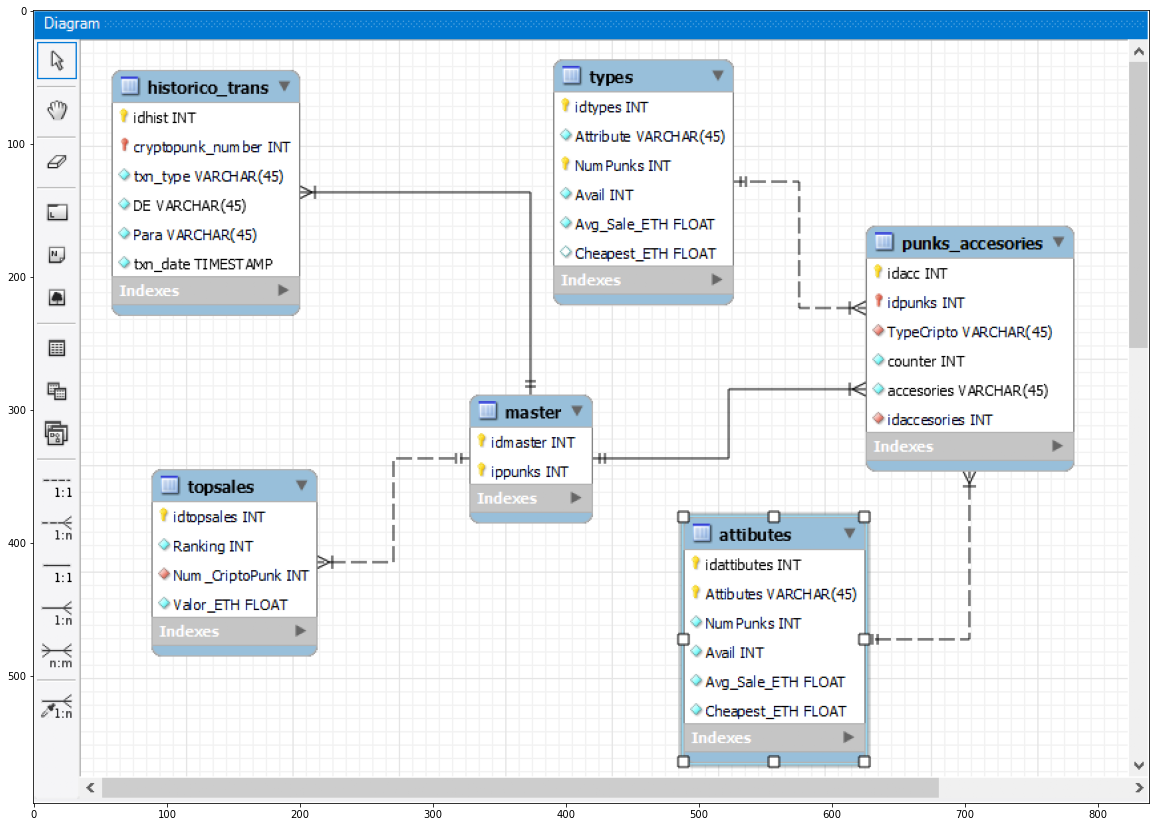

In [60]:
fig = plt.figure(figsize=(20,20))
img = mpimg.imread('.\diagrama\diagramapng.png')
plt.imshow(img)

errores  Row import failed with error: ('Cannot add or update a child row: a foreign key constraint fails (`cryptopunks`.`punks_accesories`, CONSTRAINT `punks_accesories_ibfk_3` FOREIGN KEY (`idaccesories`) REFERENCES `attributes` (`idattributes`))', 1452)

importadas 27502 ryptopunks.punks_accesories.

hist_df
